In [1]:
import numpy as np
from scipy.linalg import norm
import random
import matplotlib.pyplot as plt

In [6]:
class State:
    def __init__(self, n_qubits):
        # TODO task 1.1
        self.n_qubits = n_qubits
        self.state = np.zeros(2**n_qubits, dtype=complex)

    def initialize_state(self, qubit_values):
        assert len(qubit_values) == self.n_qubits
        # TODO task 1.2
        suma = 0
        self.state = np.zeros(2**self.n_qubits, dtype=complex)
        for i in range(len(qubit_values)):
            suma += 2**(len(qubit_values)-i-1) * qubit_values[i]
        self.state[suma] = 1
    
    def apply_gate(self, gate, n_gate, starting_qubit):
        # Apply gate to the state
        assert 0 <= starting_qubit <= self.n_qubits - n_gate
        
        I = np.eye(2)
        #gate_matrix = np.eye(2)
        gate_matrix = 1
        qubit = 0

        # Construct gate matrix for n_gate qubits
        while (qubit < self.n_qubits):
            #print(qubit)
            if qubit == starting_qubit:
                gate_matrix = np.kron(gate_matrix, gate)
                qubit = qubit + n_gate
            else:
                gate_matrix = np.kron(gate_matrix, I)
                qubit += 1
            #print(gate_matrix)
        
        # Update the state by applying the gate matrix
        self.state = np.dot(gate_matrix, self.state)
        
    def apply_H_gate(self, target_qubit):
        # TODO task 1.4
        gate = np.array([[1/2**0.5, 1/2**0.5], [1/2**0.5, -1/2**0.5]])
        self.apply_gate(gate, 1, target_qubit)
    
    def apply_X_gate(self, target_qubit):
        # TODO task 1.4
        gate = np.array([[0,1], [1, 0]])
        self.apply_gate(gate, 1, target_qubit)
        
    def apply_Y_gate(self, target_qubit):
        # TODO task 1.4
        gate = np.array([[0, -1j], [1j, 0]])
        self.apply_gate(gate, 1, target_qubit)
        
    def apply_Z_gate(self, target_qubit):
        # TODO task 1.4
        gate = np.array([[1,0], [0, -1]])
        self.apply_gate(gate, 1, target_qubit)
        
    def apply_T_gate(self, target_qubit):
        # TODO task 1.4
        gate = np.array([[1, 0], [0, np.exp(1j * np.pi / 4)]])
        self.apply_gate(gate, 1, target_qubit)
    
    def apply_S_gate(self, target_qubit):
        # TODO task 1.4
        gate = np.array([[1, 0], [0, 1j]])
        self.apply_gate(gate, 1, target_qubit)
    
    def apply_CNOT_gate(self, target_qubit):
        # TODO task 1.5
        gate = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
        self.apply_gate(gate, 2, target_qubit)
    
    def apply_CH_gate(self, target_qubit):
        # TODO task 1.5
        gate = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1/2**0.5, 1/2**0.5], [0, 0, 1/2**0.5, -1/2**0.5]])
        self.apply_gate(gate, 2, target_qubit)
        
    def apply_CY_gate(self, target_qubit):
        # TODO task 1.5
        gate = np.array([[1, 0, 0, 0], [0, 0, 0, -1j], [0, 0, 1, 0], [0, 1j, 0, 0]])
        self.apply_gate(gate, 2, target_qubit)
        
    def apply_CZ_gate(self, target_qubit):
        # TODO task 1.5
        gate = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, -1]])
        self.apply_gate(gate, 2, target_qubit)
        
    def apply_CT_gate(self, target_qubit):
        # TODO task 1.5
        gate = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, np.exp(1j * np.pi / 4)]])
        self.apply_gate(gate, 2, target_qubit)
        
    def apply_CS_gate(self, target_qubit):
        # TODO task 1.5
        gate = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1j]])
        self.apply_gate(gate, 2, target_qubit)
    
    def apply_SWAP_gate(self, target_qubit):
        # TODO task 1.5
        gate = np.array([[1, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 1]])
        self.apply_gate(gate, 2, target_qubit)
    
    def apply_CNOT10_gate(self, target_qubit):
        # TODO task 1.5
        gate = np.array([[0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
        self.apply_gate(gate, 2, target_qubit)
    
    def apply_TOFFOLI_gate(self, target_qubit):
        # TODO task 1.5
        I = np.eye(8)
        I[6,6] = 0
        I[7,7] = 0
        I[6,7] = 1
        I[7,6] = 1
        gate = I
        self.apply_gate(gate, 3, target_qubit)
        
    """def produce_measurement(self):
        # TODO task 1.6
        range1 = np.arange(0,2**self.n_qubits)
        rstate = random.choices(range1, weights = self.state * np.conjugate(self.state), k = 1)[0]
        m_state = np.zeros(self.n_qubits)
        i = 0
        #print(rstate)
        while(i < self.n_qubits):
            if(2**(self.n_qubits - i-1) > rstate):
                m_state[i] = 0
                i+=1
            else :
                m_state[i] =1
                rstate -= 2**(self.n_qubits - i-1)
                i+=1
                   
        return m_state
    

    def print_probabilities(self):
        probs =  self.state * np.conjugate(self.state)
        for i in range(len(self.state)):
            s = str(i) + "  "+ str(bin(i)) + "  " + str(probs[i])
            print(s)"""
    
    def produce_measurement(self):
        projectors=[np.array([[1,0],[0,0]]), np.array([[0,0],[0,1]]) ]
        
        def project(i,j,self):
            shape_tuple = ()
            for q in range(self.n_qubits):
                shape_tuple = shape_tuple + (2,)
            
            modified_state=np.reshape(self.state, shape_tuple)
            projected=np.tensordot(projectors[j],modified_state,(1,i))
            return np.moveaxis(projected,0,i)
        
        measurements = np.zeros(self.n_qubits, dtype=int)
        self.probabilities = np.zeros(self.n_qubits, dtype=float)
        for i in range(self.n_qubits):
            projected=project(i,0,self) 
            #print(projected)
            norm_projected=norm(projected.flatten())
            #measurements = np.zeros(self.n_qubits, dtype=int)
            print("No qubit {}. Probability to be 0: {}".format(i, norm_projected**2))
            self.probabilities[i] = norm_projected**2
            if np.random.random()<norm_projected**2: # Sample according to probability distribution
                #print(projected/norm_projected)
                measurement_result = 0
            else:
                projected=project(i,1,self)
                #print(projected/norm(projected))
                measurement_result = 1
            measurements[i] = measurement_result
        
        return measurements.tolist()
    
    def produce_specific_measurement(self, qubit):
        projectors=[np.array([[1,0],[0,0]]), np.array([[0,0],[0,1]]) ]
        
        def project(i,j,self):
            shape_tuple = ()
            for q in range(self.n_qubits):
                shape_tuple = shape_tuple + (2,)
            
            modified_state=np.reshape(self.state, shape_tuple)
            projected=np.tensordot(projectors[j],modified_state,(1,i))
            return np.moveaxis(projected,0,i)
        
        projected=project(qubit,0,self) 
        norm_projected=norm(projected.flatten())
        print("No qubit {}. Probability to be 0: {}".format(qubit, norm_projected**2))

        if np.random.random()<norm_projected**2: 
            measurement_result = 0
        else:
            projected=project(qubit,1,self)
            measurement_result = 1
        
        return measurement_result
    
    def plot_state_probabilities(self):
        data = {}
        for i in range(self.n_qubits):
            key = str(i)
            value = self.probabilities[i]
            data[key] = value
        courses = list(data.keys())
        values = list(data.values())
      
        fig = plt.figure(figsize = (8, 4))
     
        # creating the bar plot
        plt.bar(courses, values, color ='maroon', 
            width = 0.4)
     
        plt.xlabel("qubit number")
        plt.ylabel("probabilities")
        plt.title("probabilities of measuring 0 in computational basis")
        plt.show()


No qubit 0. Probability to be 0: 0.4999999999999999
No qubit 1. Probability to be 0: 0.4999999999999999
No qubit 2. Probability to be 0: 0.0
No qubit 3. Probability to be 0: 0.9999999999999998
No qubit 4. Probability to be 0: 0.9999999999999998
[0, 0, 1, 0, 0]
No qubit 0. Probability to be 0: 0.4999999999999999
No qubit 1. Probability to be 0: 0.4999999999999999
No qubit 2. Probability to be 0: 0.0
No qubit 3. Probability to be 0: 0.9999999999999998
No qubit 4. Probability to be 0: 0.9999999999999998
[1, 0, 1, 0, 0]
No qubit 0. Probability to be 0: 0.4999999999999999
No qubit 1. Probability to be 0: 0.4999999999999999
No qubit 2. Probability to be 0: 0.0
No qubit 3. Probability to be 0: 0.9999999999999998
No qubit 4. Probability to be 0: 0.9999999999999998
[1, 1, 1, 0, 0]


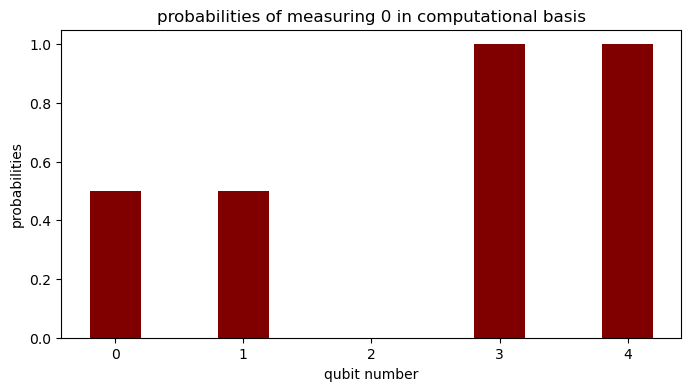

No qubit 0. Probability to be 0: 0.4999999999999999
1


In [7]:
qstate = State(5)
qstate.initialize_state([0,1,1,0,0])
qstate.apply_H_gate(0)
qstate.apply_Z_gate(1)
qstate.apply_CNOT10_gate(0)
print(qstate.produce_measurement())
print(qstate.produce_measurement())
print(qstate.produce_measurement())
qstate.plot_state_probabilities()
print(qstate.produce_specific_measurement(0))

In [91]:
# Gates class

class Gate:
    def __init__(self, dim):
        self.dim = dim
        self.gate = np.zeros([dim, dim], dtype=float)
    def initialize_gate(self, gate_values):
        assert np.shape(gate_values) == (self.dim, self.dim)
        for i in range(self.dim):
            for j in range(slef.dim):
                self.gate[i][j] = gate_values[i][j]
    def compute_transpose(self):
        L, W = np.shape(self.gate)
        matrix_new = np.zeros([W, L], dtype=complex)
        for i in range(L):
            for j in range(W):
                matrix_new[j][i] = self.gate[i][j]
        return matrix_new
    def compute_adjoint(self):
        return np.transpose(np.conj(self.gate))
    def add_gates(gate_list):
        return np.sum(gate_list, axis=0)
    def multiply_gates(gates):
        L, W = gates[0].shape
        first = np.eye(L)
        for i in range(len(gates)):
            first = np.dot(first, gates[i])
        return first
    def multiply_constant(self, constant):
        return constant*self.gate
    def compute_rank(self):
        return np.linalg.matrix_rank(self.gate)
    def is_valid_gate(self):
        bec = 0
        if np.allclose(multiply_gates([self.gate, compute_adjoint(self.gate)]), np.eye(len(self.gate))):
            bec = 1
        return bec
    def get_eigen(self):
        eigenvalues, eigenvectors = np.linalg.eig(self.gate)
        return eigenvalues, eigenvectors
    def plot_gate_representation(self):
        eigenvalues, eigenvectors = get_eigen(self.gate)
        for i in range(len(eigenvectors)):
            plt.quiver(0, 0, eigenvectors[i][0], eigenvectors[i][1], color='r', units='xy', scale=1)
        plt.xlim([-2, 2])
        plt.ylim([-2, 2])
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Eigenvectors plot')
        plt.show()

In [92]:
# Gates

def X_gate():
    return np.array([[0,1], [1, 0]])
def Y_gate():
    return np.array([[0, -1j], [1j, 0]])
def Z_gate():
    return np.array([[1,0], [0, -1]])
def H_gate():
    return np.array([[1/2**0.5, 1/2**0.5], [1/2**0.5, -1/2**0.5]])
def S_gate():
    return np.array([[1, 0], [0, 1j]])
def T_gate():
    return np.array([[1, 0], [0, np.exp(1j * np.pi / 4)]])
def CNOT_gate():
    return np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
    
def CH_gate():
    return np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1/2**0.5, 1/2**0.5], [0, 0, 1/2**0.5, -1/2**0.5]])
    
def CY_gate():
    return np.array([[1, 0, 0, 0], [0, 0, 0, -1j], [0, 0, 1, 0], [0, 1j, 0, 0]])
    
def CZ_gate():
    return np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, -1]])
    
def CT_gate():
    return np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, np.exp(1j * np.pi / 4)]])
    
def CS_gate():
    return np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1j]])

def SWAP_gate():
    return np.array([[1, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 1]])

def CNOT10_gate():
    return np.array([[0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

def TOFFOLI_gate():
    I = np.eye(8)
    I[6,6] = 0
    I[7,7] = 0
    I[6,7] = 1
    I[7,6] = 1
    return I

In [82]:
# Task B1

def create_custom_gate():
    dim = int(input("Enter no qubits affected:"))
    gates = input("Enter list of gates separated by space:")
    list_gates = gates.split()
    init_gate = np.eye(2**dim)
    for i in range(len(list_gates)):
        gate_function = list_gates[i]+"_gate()"
        gate = eval(gate_function)
        init_gate = np.dot(init_gate, gate)
    return dim, init_gate 

In [83]:
dim, gate = create_custom_gate()
qstate.apply_gate(gate, dim, 3)
print(qstate.produce_measurement())

Enter no qubits affected:1
Enter list of gates separated by space:X
No qubit 0. Probability to be 0: 0.4999999999999999
No qubit 1. Probability to be 0: 0.4999999999999999
No qubit 2. Probability to be 0: 0.0
No qubit 3. Probability to be 0: 0.0
No qubit 4. Probability to be 0: 0.9999999999999998
([0.4999999999999999, 0.4999999999999999, 0.0, 0.0, 0.9999999999999998], [0, 1, 1, 1, 0])


In [ ]:
def custom_controlled_gate(gate, target_list, control):
    projectors=[np.array([[1,0],[0,0]]), np.array([[0,0],[0,1]]) ]
    pass
    